In [2]:
from mpl_toolkits.mplot3d import Axes3D    ##New Library required for projected 3d plots
import numpy
from matplotlib import pyplot, cm
from numba import njit
import time

In [3]:
@njit
def solve_2d_linConv():
    ###variable declarations
    nx = 201
    ny = 201
    nt = 100
    c = 1
    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)
    sigma = .2
    dt = sigma * dx
    
    x = numpy.linspace(0, 2, nx)
    y = numpy.linspace(0, 2, ny)
    
    u0 = numpy.ones((ny, nx)) ##create a 1xn vector of 1's
    un = numpy.ones((ny, nx)) ##
    
    ###Assign initial conditions    
    
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u0[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    u=u0.copy()
    row, col = u.shape

    
    for n in range(nt + 1): ##loop across number of time steps
        un = u.copy()
        for j in range(1, row):
            for i in range(1, col):
                u[j, i] = (un[j, i] - (c * dt / dx * (un[j, i] - un[j, i - 1])) -
                                      (c * dt / dy * (un[j, i] - un[j - 1, i])))
                u[0, :] = 1
                u[-1, :] = 1
                u[:, 0] = 1
                u[:, -1] = 1
               
    return x, y, u0, u

In [4]:
#compute the cpu time of the solving 1d linear convection
start = time.time()
x, y, u0, u = solve_2d_linConv() 
end = time.time()        
print("Execution time is : {msec} ms".format(msec=(end-start)*1000) )   

Execution time is : 1642.2393321990967 ms


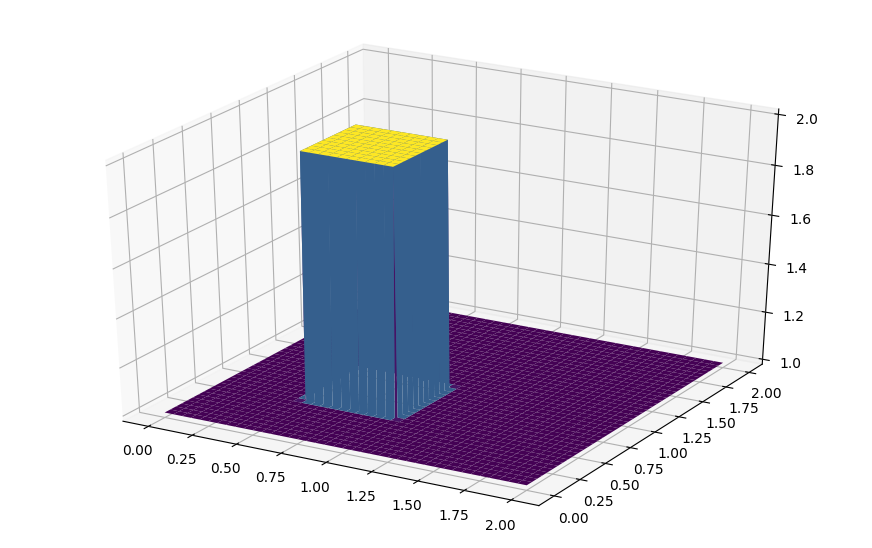

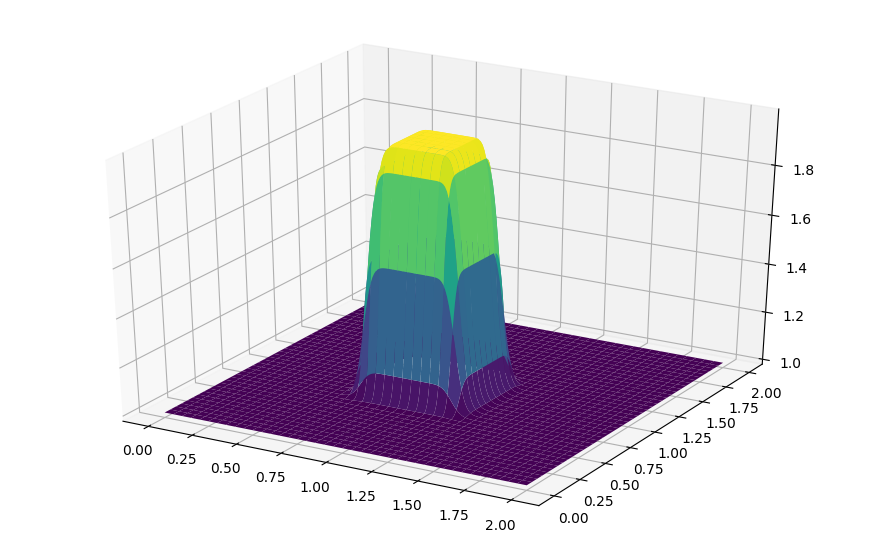

In [5]:
###Plot Initial Condition
##the figsize parameter can be used to produce different sized images
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = numpy.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u0[:], cmap=cm.viridis)


fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)